在鐵達尼資料集中，今天我們專注觀察變數之間的相關性，以 Titanic_train.csv 中，首先將有遺失值的數值刪除，我們取 Titanic_train.csv 的年齡資料，試著將課堂中所學的方法應用上去。



Q1：產生一個新的變數 (Age_above65_)  Age ≧ 65 為 'Y'，其餘為 'N'。  

Q2：將性別 (sex) 一併列入考慮，產生一個新的變數(Age_above65_female)，當 sex = female 或Age>=65為'Y'，其餘為'N'。

Q3：透過昨天課程的內容，驗證產生的兩個新變數，哪一個和目標變數(Survived_cate) 的相關性較高？

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import researchpy

In [20]:
data = pd.read_csv('train.csv')
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Survived_cate'] = data['Survived']
data['Survived_cate'] = data['Survived_cate'].astype('object')
data.isnull().any()

PassengerId      False
Survived         False
Pclass           False
Name             False
Sex              False
Age              False
SibSp            False
Parch            False
Ticket           False
Fare             False
Cabin             True
Embarked          True
Survived_cate    False
dtype: bool

In [22]:
New_data = data[['Age', 'Survived_cate', 'Sex']].dropna()
New_data.head()

,Age,Survived_cate,Sex
0,22.0,0,male
1,38.0,1,female
2,26.0,1,female
3,35.0,1,female
4,35.0,0,male


In [23]:
def Age_above65(x):
    if x >= 65:
        return 'Y'
    else:
        return 'N'
    
New_data['Age_above65'] = New_data['Age'].apply(Age_above65)
New_data.head()

,Age,Survived_cate,Sex,Age_above65
0,22.0,0,male,N
1,38.0,1,female,N
2,26.0,1,female,N
3,35.0,1,female,N
4,35.0,0,male,N


In [32]:
def female_65(data):
    if data['Age_above65'] == 'Y':
        return 'Y'
    else:
        if data['Sex'] == 'female':
            return 'Y'
        else:
            return 'N'
    
New_data['Age_above65_female'] = New_data.apply(female_65, axis = 1)
New_data.head()


,Age,Survived_cate,Sex,Age_above65,Age_above65_female
0,22.0,0,male,N,N
1,38.0,1,female,N,Y
2,26.0,1,female,N,Y
3,35.0,1,female,N,Y
4,35.0,0,male,N,N


In [34]:
# 兩個變數和生存數都是離散資料
def judgment_CramerV(df,V):
    if df == 1:
        if V < 0.10:
            qual = 'negligible'
        elif V < 0.30:
            qual = 'small'
        elif V < 0.50:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 2:
        if V < 0.07:
            qual = 'negligible'
        elif V < 0.21:
            qual = 'small'
        elif V < 0.35:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 3:
        if V < 0.06:
            qual = 'negligible'
        elif V < 0.17:
            qual = 'small'
        elif V < 0.29:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 4:
        if V < 0.05:
            qual = 'negligible'
        elif V < 0.15:
            qual = 'small'
        elif V < 0.25:
            qual = 'medium'
        else:
            qual = 'large'
    else:
        if V < 0.05:
            qual = 'negligible'
        elif V < 0.13:
            qual = 'small'
        elif V < 0.22:
            qual = 'medium'
        else:
            qual = 'large'
    return(qual)

In [36]:
contTable = pd.crosstab(New_data['Survived_cate'], New_data['Age_above65'])
contTable

Age_above65,N,Y
Survived_cate,,
0,539,10
1,341,1


In [39]:
df1 = min(contTable.shape[0], contTable.shape[1]) - 1
df1

1

In [41]:
cro1, res1 = researchpy.crosstab(New_data['Survived_cate'], New_data['Age_above65'], test = 'chi-square')
print(res1)

                Chi-square test  results
0  Pearson Chi-square ( 1.0) =    4.0408
1                    p-value =    0.0444
2               Cramer's phi =    0.0673


negligible


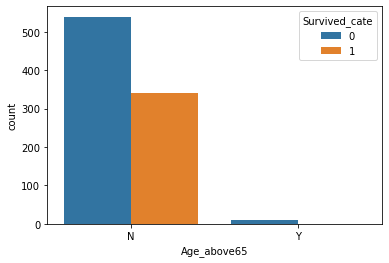

In [44]:
print(judgment_CramerV(df1, res1.loc[2, 'results']))
g = sns.countplot(x = 'Age_above65', hue = 'Survived_cate', data = New_data)

In [45]:
contTable2 = pd.crosstab(New_data['Survived_cate'], New_data['Age_above65_female'])
contTable2

Age_above65_female,N,Y
Survived_cate,,
0,458,91
1,108,234


In [46]:
df2 = min(contTable2.shape[0], contTable2.shape[1]) - 1
df2

1

In [47]:
cor2, res2 = researchpy.crosstab(New_data['Survived_cate'], New_data['Age_above65_female'], test = 'chi-square')
res2

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,244.4544
1,p-value =,0.0000
2,Cramer's phi =,0.5238


large


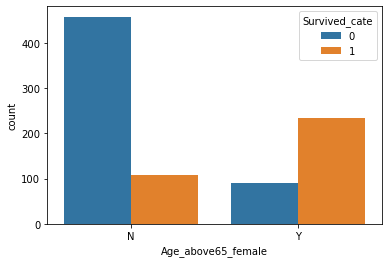

In [48]:
print(judgment_CramerV(df2, res2.loc[2, 'results']))
g = sns.countplot(x = 'Age_above65_female', hue = 'Survived_cate', data = New_data)